In [1]:
from google.colab import files
uploaded = files.upload()

Saving housepricedata.csv to housepricedata.csv


In [4]:
import pandas as pd 
data = pd.read_csv("housepricedata.csv") #load into dataframe
data.head() #check out top of dataframe

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [15]:
arr = data.values #turn into array

xvalues = dataset[:,0:10]
yvalues = dataset[:,10]

print(xvalues)

[[ 8450     7     5 ...     8     0   548]
 [ 9600     6     8 ...     6     1   460]
 [11250     7     5 ...     6     1   608]
 ...
 [ 9042     7     9 ...     9     2   252]
 [ 9717     5     6 ...     5     0   240]
 [ 9937     5     6 ...     6     0   276]]


In [14]:
print(yvalues)

[1 1 1 ... 1 0 0]


In [25]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
xvalues_scale = min_max_scaler.fit_transform(xvalues)

xvalues_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [30]:
from sklearn.model_selection import train_test_split
#splits data into train and (val and test) then splits val and tests apart
xvalues_train, xvalues_val_and_test, yvalues_train, yvalues_val_and_test = train_test_split(xvalues_scale, yvalues, test_size=0.3)
xvalues_val, xvalues_test, yvalues_val, yvalues_test = train_test_split(xvalues_val_and_test, yvalues_val_and_test, test_size=0.5)

In [26]:

from keras.models import Sequential
from keras.layers import Dense

In [32]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [34]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
hist = model.fit(xvalues_train, yvalues_train,
          batch_size=32, epochs=100,
          validation_data=(xvalues_val, yvalues_val))

Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 0.6800 - accuracy: 0.5210 - val_loss: 0.6762 - val_accuracy: 0.5023
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.5085 - val_loss: 0.6705 - val_accuracy: 0.5342
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6701 - accuracy: 0.5502 - val_loss: 0.6649 - val_accuracy: 0.6119
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6658 - accuracy: 0.6078 - val_loss: 0.6595 - val_accuracy: 0.6667
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6585 - accuracy: 0.6810 - val_loss: 0.6539 - val_accuracy: 0.7169
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6579 - accuracy: 0.7088 - val_loss: 0.6482 - val_accuracy: 0.7443
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6458 - accuracy: 0.7388 - val_loss: 0.6422 - val_accuracy: 0.7808
Epoch 8/100


In [37]:

model.evaluate(xvalues_test, yvalues_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2759 - accuracy: 0.8995


[0.27589407563209534, 0.8995434045791626]

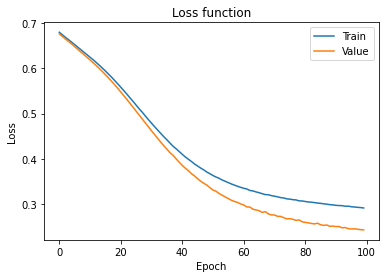

In [40]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Value'])
plt.show()

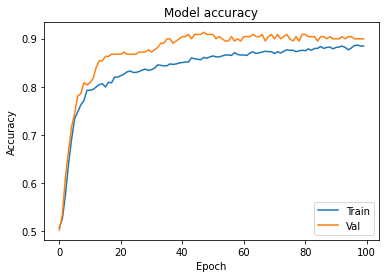

In [41]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()